In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 1000)

In [9]:
df = pd.read_csv('toyota.csv')
print('Number of rows and columns', df.shape)
df.head()

Number of rows and columns (1436, 11)


,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.00,46986,Diesel,90,1.00,0,2000,three,1165
1,1,13750,23.00,72937,Diesel,90,1.00,0,2000,3,1165
2,2,13950,24.00,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.00,48000,Diesel,90,0.00,0,2000,3,1165
4,4,13750,30.00,38500,Diesel,90,0.00,0,2000,3,1170


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [78]:
df.isna().sum()

,0
Unnamed: 0,0
Price,0
Age,100
KM,0
FuelType,100
HP,0
MetColor,150
Automatic,0
CC,0
Doors,0


In [79]:
df.describe(include='all')

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.00,1436.00,1336.00,1436,1336,1436,1286.00,1436.00,1436.00,1436,1436.00
unique,NaN,NaN,NaN,1256,3,13,NaN,NaN,NaN,7,NaN
top,NaN,NaN,NaN,??,Petrol,110,NaN,NaN,NaN,5,NaN
freq,NaN,NaN,NaN,15,1177,833,NaN,NaN,NaN,673,NaN
mean,717.50,10730.82,55.67,NaN,NaN,NaN,0.67,0.06,1566.83,NaN,1072.46
std,414.68,3626.96,18.59,NaN,NaN,NaN,0.47,0.23,187.18,NaN,52.64
min,0.00,4350.00,1.00,NaN,NaN,NaN,0.00,0.00,1300.00,NaN,1000.00
25%,358.75,8450.00,43.00,NaN,NaN,NaN,0.00,0.00,1400.00,NaN,1040.00
50%,717.50,9900.00,60.00,NaN,NaN,NaN,1.00,0.00,1600.00,NaN,1070.00
75%,1076.25,11950.00,70.00,NaN,NaN,NaN,1.00,0.00,1600.00,NaN,1085.00


In [80]:
df.duplicated().sum()

0

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.shape

(1436, 11)

In [83]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [84]:
df.columns = df.columns.str.lower()

In [85]:
df.head()

,unnamed: 0,price,age,km,fueltype,hp,metcolor,automatic,cc,doors,weight
0,0,13500,23.00,46986,Diesel,90,1.00,0,2000,three,1165
1,1,13750,23.00,72937,Diesel,90,1.00,0,2000,3,1165
2,2,13950,24.00,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.00,48000,Diesel,90,0.00,0,2000,3,1165
4,4,13750,30.00,38500,Diesel,90,0.00,0,2000,3,1170


In [86]:
df.columns = df.columns.str.replace(' ', '_')

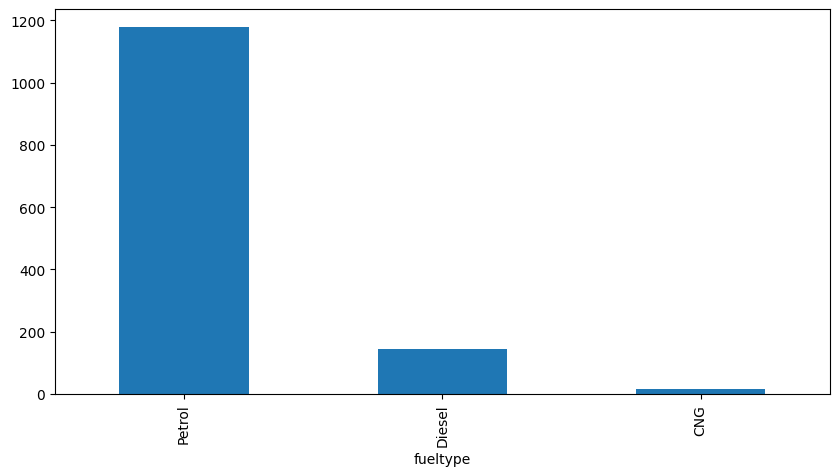

In [87]:
df.fueltype.value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

In [88]:
df['age'] = df['age'].fillna(0).astype(int)

In [89]:
df.head()

,unnamed:_0,price,age,km,fueltype,hp,metcolor,automatic,cc,doors,weight
0,0,13500,23,46986,Diesel,90,1.00,0,2000,three,1165
1,1,13750,23,72937,Diesel,90,1.00,0,2000,3,1165
2,2,13950,24,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26,48000,Diesel,90,0.00,0,2000,3,1165
4,4,13750,30,38500,Diesel,90,0.00,0,2000,3,1170


In [90]:
df["metcolor"] = df["metcolor"].fillna(0).astype(int)

In [91]:
df.metcolor.value_counts()

,count
metcolor,
1,868
0,568


In [92]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in df.columns:

    if df[column].dtype == 'object':

        df[column] = df[column].replace('??', pd.NA)

        encoder.fit(df[column].dropna().unique().tolist() + ['Unknown'])
        # Transform the column to numerical values
        df[column] = encoder.transform(df[column].fillna('Unknown'))


knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)
df_knn = knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=df.columns)
df_knn.head()


,unnamed:_0,price,age,km,fueltype,hp,metcolor,automatic,cc,doors,weight
0,0.00,13500.00,23.00,560.00,1.00,9.00,1.00,0.00,2000.00,7.00,1165.00
1,1.00,13750.00,23.00,958.00,1.00,9.00,1.00,0.00,2000.00,1.00,1165.00
2,2.00,13950.00,24.00,495.00,1.00,9.00,0.00,0.00,2000.00,1.00,1165.00
3,3.00,14950.00,26.00,579.00,1.00,9.00,0.00,0.00,2000.00,1.00,1165.00
4,4.00,13750.00,30.00,453.00,1.00,9.00,0.00,0.00,2000.00,1.00,1170.00


In [93]:
df.describe()

,unnamed:_0,price,age,km,fueltype,hp,metcolor,automatic,cc,doors,weight
count,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00,1436.00
mean,717.50,10730.82,51.80,632.64,1.95,3.83,0.60,0.06,1566.83,2.04,1072.46
std,414.68,3626.96,22.86,364.33,0.46,3.67,0.49,0.23,187.18,0.97,52.64
min,0.00,4350.00,0.00,0.00,0.00,0.00,0.00,0.00,1300.00,0.00,1000.00
25%,358.75,8450.00,40.00,325.75,2.00,1.00,0.00,0.00,1400.00,1.00,1040.00
50%,717.50,9900.00,59.00,636.00,2.00,1.00,1.00,0.00,1600.00,2.00,1070.00
75%,1076.25,11950.00,68.00,944.25,2.00,8.00,1.00,0.00,1600.00,3.00,1085.00
max,1435.00,32500.00,80.00,1255.00,3.00,12.00,1.00,1.00,2000.00,7.00,1615.00


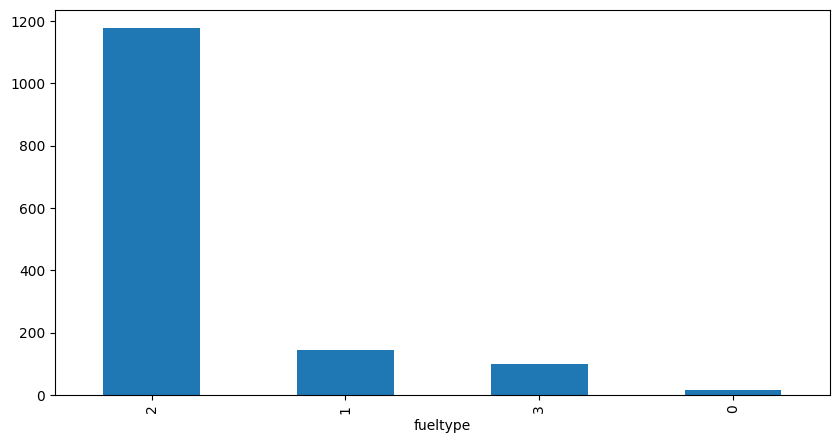

In [94]:
df.fueltype.value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

In [95]:
df.isna().sum()

,0
unnamed:_0,0
price,0
age,0
km,0
fueltype,0
hp,0
metcolor,0
automatic,0
cc,0
doors,0


In [96]:
df['fueltype'].value_counts(ascending=True).mean()/100

3.59

In [97]:
df['fueltype'].value_counts(ascending=True).std()/100

5.479555943079086

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def balance_column(df, column_name):

    if column_name not in df.columns:
        print(f"Warning: Column '{column_name}' not found in DataFrame. Skipping balancing for this column.")
        return df

    value_counts = df[column_name].value_counts()
    min_count = min(value_counts)


    balanced_df = pd.DataFrame()
    for value in value_counts.index:
        balanced_df = pd.concat([balanced_df, df[df[column_name] == value].sample(min_count)])

    return balanced_df

print(df.shape)
# ... Rest of your code ...

(1436, 11)


In [99]:
df.head()

,unnamed:_0,price,age,km,fueltype,hp,metcolor,automatic,cc,doors,weight
0,0,13500,23,560,1,9,1,0,2000,7,1165
1,1,13750,23,958,1,9,1,0,2000,1,1165
2,2,13950,24,495,1,9,0,0,2000,1,1165
3,3,14950,26,579,1,9,0,0,2000,1,1165
4,4,13750,30,453,1,9,0,0,2000,1,1170


In [100]:
df.shape

(1436, 11)

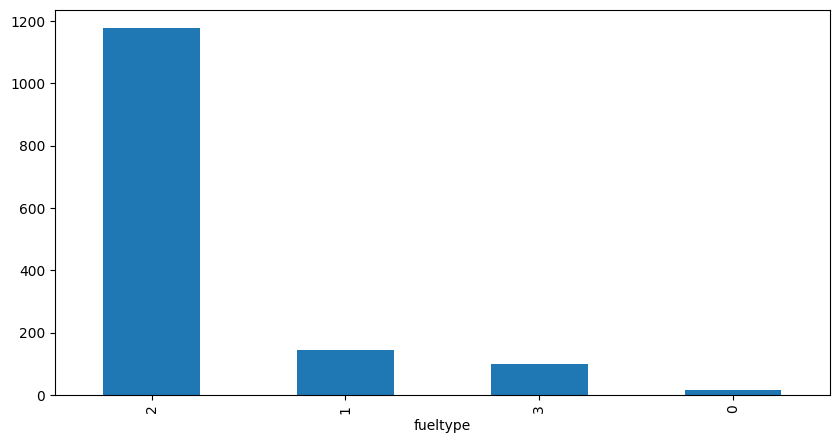

In [101]:
df['fueltype'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

In [102]:
df['hp'] = df['hp'].fillna(0).astype(int)

In [103]:
df.head()

,unnamed:_0,price,age,km,fueltype,hp,metcolor,automatic,cc,doors,weight
0,0,13500,23,560,1,9,1,0,2000,7,1165
1,1,13750,23,958,1,9,1,0,2000,1,1165
2,2,13950,24,495,1,9,0,0,2000,1,1165
3,3,14950,26,579,1,9,0,0,2000,1,1165
4,4,13750,30,453,1,9,0,0,2000,1,1170


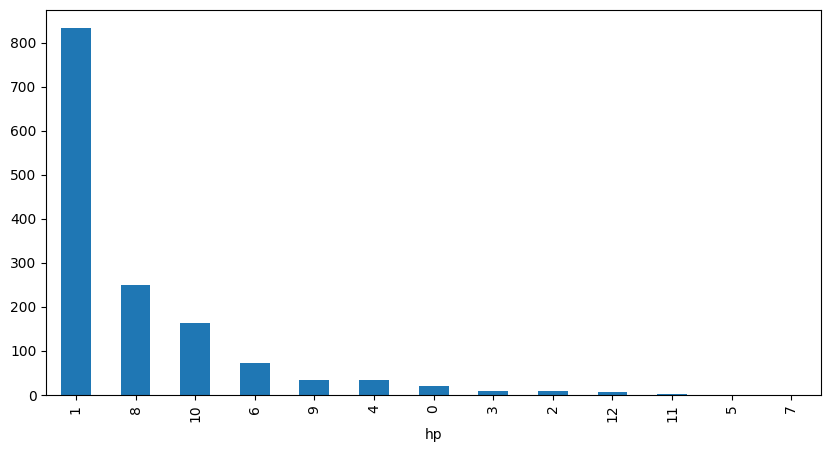

In [104]:
df['hp'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

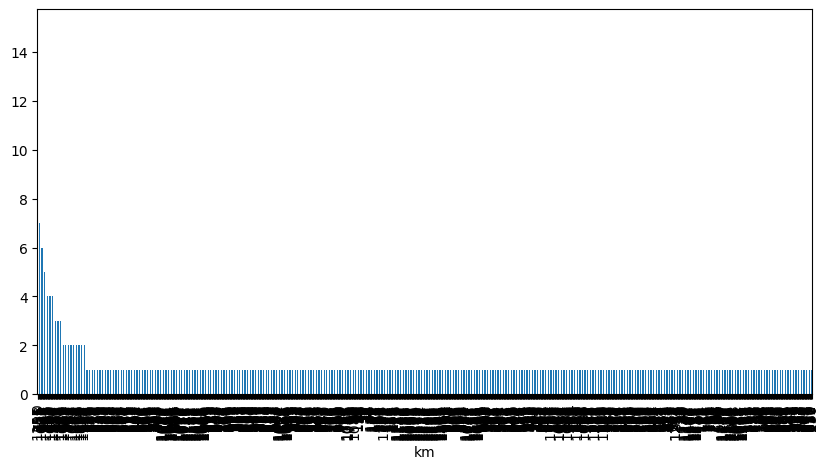

In [107]:
df['km'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

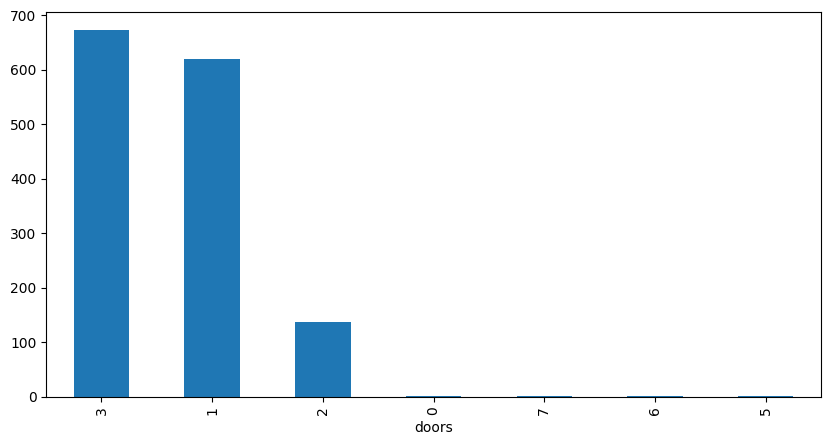

In [108]:
df['doors'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

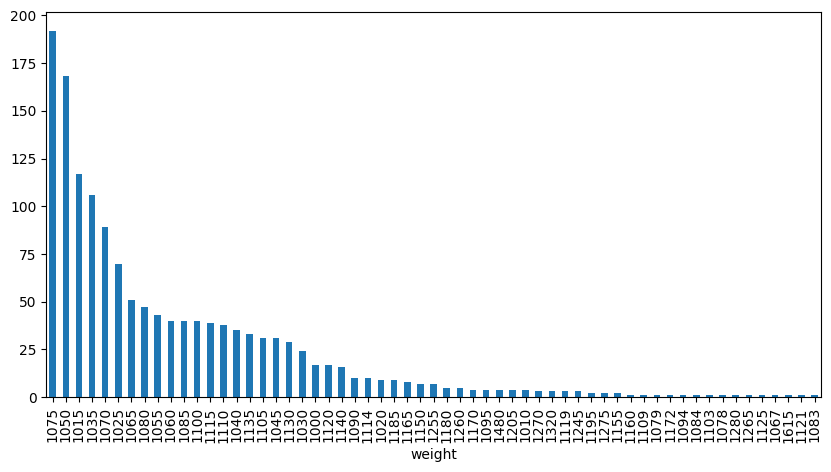

In [109]:
df['weight'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()


In [110]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [111]:
X = df.drop('price', axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [112]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([ 9485.28179941, 11900.83340728,  9623.35063643,  8011.21003506,
        9642.52030054, 11029.05273257,  9077.4284357 ,  6995.37300266,
       13479.66365639, 13167.60408911, 11225.12187151,  9356.29091826,
       13136.62945903, 10873.82744161, 10189.66786577,  9510.9994768 ,
       10992.47389031, 19227.65263147,  8301.98776815,  7470.24766766,
       11895.52454171, 16378.7626385 ,  7208.37099358,  9486.85829769,
        7780.70886166, 16114.84603751, 10460.33661016,  8237.98735348,
       15785.08055332, 13162.52637116,  7664.59428778,  8131.56030779,
        9968.40175471,  9732.97891317,  9476.6368095 ,  7531.16281119,
        8957.77784515,  9473.92136296, 15968.18485781, 10789.76247128,
        8968.3386089 ,  9350.99634717,  7843.465535  ,  7369.43530179,
        6695.37273799, 16820.56265347,  9657.30997276, 10473.53495465,
        8103.66103645, 13038.22491888, 12215.46149954,  6374.39755743,
       15765.57744778, 17638.97412578,  7290.37488256,  8153.93122252,
      

In [113]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
y_pred1 = lr1.predict(X_test)
y_pred1

array([ 9950,  8950,  9950,  8950,  8950,  8950,  8950,  7950, 11950,
       11950,  8950,  8950, 11950, 11950,  8950,  8950, 11950, 21500,
        7750,  8950, 11950, 11950,  8950,  9950,  8950, 19950,  8950,
        7750, 15950, 11950,  8950,  8950,  8950,  8950,  8950,  8950,
        8950,  8950, 15950,  9950,  8950,  8950,  8950,  7950,  7950,
       18950,  8950,  8950,  8950, 11950, 11950,  7950, 15950, 21500,
        7950,  8950, 10950, 10950, 19950, 17950, 11950,  9950,  8950,
       11950, 11950,  8950, 13500,  7750,  9950,  8950, 19950, 11450,
       11950,  7500, 11950, 11950,  7450,  7750,  8950,  7950,  8950,
        8950, 11450, 10950,  7950,  8950,  8950, 11950,  8950, 10950,
        7750,  6450,  8950,  8950, 10950,  8950, 19950,  8950, 11950,
        9950,  8950,  7950, 10950, 15950,  7500,  7750, 21500,  7600,
        7950,  6950, 10950, 21500,  8950, 11950,  8950,  8950,  8950,
       11950,  9950, 11950,  7750,  8950,  8950, 19950, 11950,  9950,
       11950,  9950,

In [114]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)
print('MAE:', mae)

MSE: 4922096.188461621
R2: 0.631104393083084
MAE: 1352.9128390586886


In [115]:
# prompt: give me a better algorithm and mse with best parameter

from sklearn.ensemble import GradientBoostingRegressor

# ... (Your existing code) ...

# Try Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print('Gradient Boosting Regressor:')
print('MSE:', mse_gbr)
print('R2:', r2_gbr)
print('MAE:', mae_gbr)


# Hyperparameter Tuning (example with GridSearchCV - you can explore other methods)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_
y_pred_best_gbr = best_gbr.predict(X_test)
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)
mae_best_gbr = mean_absolute_error(y_test, y_pred_best_gbr)

print('\nBest Gradient Boosting Regressor (after hyperparameter tuning):')
print('MSE:', mse_best_gbr)
print('R2:', r2_best_gbr)
print('MAE:', mae_best_gbr)
print("Best parameters:", grid_search.best_params_)

Gradient Boosting Regressor:
MSE: 1174403.9389993777
R2: 0.91198212362075
MAE: 853.1933665737512

Best Gradient Boosting Regressor (after hyperparameter tuning):
MSE: 1120618.9516413894
R2: 0.9160131390245033
MAE: 831.107642116364
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [116]:
from xgboost import XGBRegressor

# ... (Your existing code) ...

# Try Gradient Boosting Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb= r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print('Gradient Boosting Regressor:')
print('MSE:', mse_xgb)
print('R2:', r2_xgb)
print('MAE:', mae_xgb)


# Hyperparameter Tuning (example with GridSearchCV - you can explore other methods)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)

print('\nBest Gradient Boosting Regressor (after hyperparameter tuning):')
print('MSE:', mse_best_xgb)
print('R2:', r2_best_xgb)
print('MAE:', mae_best_xgb)
print("Best parameters:", grid_search.best_params_)

Gradient Boosting Regressor:
MSE: 1220770.10715877
R2: 0.9085071086883545
MAE: 856.5096198187935

Best Gradient Boosting Regressor (after hyperparameter tuning):
MSE: 1136011.753535341
R2: 0.9148594737052917
MAE: 822.336413913303
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [124]:
from sklearn.metrics import accuracy_score

threshold = 0.5
y_pred_classes = (y_pred_best_xgb > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy of the best XGBoost model: {accuracy}")

Accuracy of the best XGBoost model: 0.09722222222222222


In [125]:
df.head()

,unnamed:_0,price,age,km,fueltype,hp,metcolor,automatic,cc,doors,weight
0,0,13500,23,560,1,9,1,0,2000,7,1165
1,1,13750,23,958,1,9,1,0,2000,1,1165
2,2,13950,24,495,1,9,0,0,2000,1,1165
3,3,14950,26,579,1,9,0,0,2000,1,1165
4,4,13750,30,453,1,9,0,0,2000,1,1170


In [126]:
# prompt: give me a csv for output df

import pandas as pd

# Assuming 'df' is your DataFrame from the previous code
# Create a new DataFrame with selected columns
output_df = df[['price', 'age', 'km', 'fueltype', 'hp', 'metcolor', 'automatic', 'cc', 'doors', 'weight']]

# Convert to CSV
output_df.to_csv('output.csv', index=False)